<a href="https://colab.research.google.com/github/bpratik01/ML-projects/blob/main/Ads_Sales_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Ads Sales Prediction Model**


# **Overview**
This machine learning model is designed to predict whether a person will purchase a product based on their income and age. It utilizes the Social Network Ads dataset, a dataset that contains information about users' age, income, and their decision to purchase a product through a social network advertisement.

# **Dataset**
The dataset used for training and testing this model is the Social Network Ads dataset. It includes the following columns:

**User ID**: A unique identifier for each user.
**Gender**: The gender of the user (Male or Female).
**Age**: The age of the user.
**Estimated Salary**: The estimated annual salary of the user.
**Purchased**: The target variable indicating whether the user purchased the product (0 for No, 1 for Yes).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df.drop('User ID', axis = 1)

In [7]:
df.shape

(400, 4)

In [8]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [9]:
sns.set(style="darkgrid")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

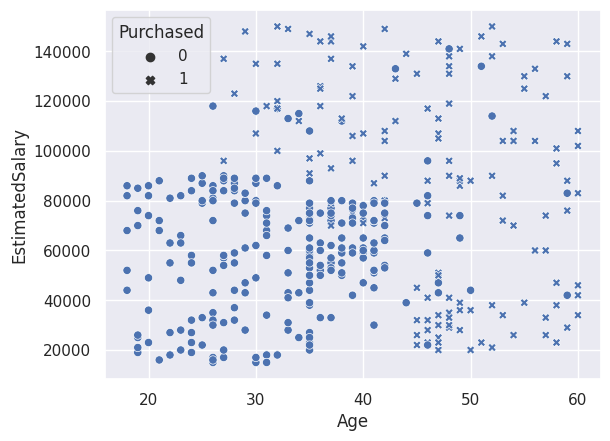

In [10]:
sns.scatterplot(data = df, x='Age', y ='EstimatedSalary', style = 'Purchased')

<Axes: xlabel='Purchased', ylabel='count'>

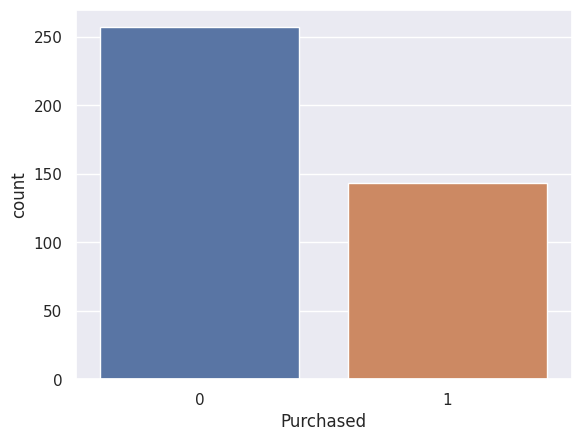

In [11]:
sns.countplot(data = df, x ='Purchased')

# **Train-Test-Split**

In [12]:
X = df.drop(['Purchased', 'Gender'], axis =1)
Y = df['Purchased']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =42)

In [14]:
print(X.shape, x_train.shape, x_test.shape)
print(Y.shape, y_train.shape, y_test.shape)

(400, 2) (320, 2) (80, 2)
(400,) (320,) (80,)


# **Data-Standardization**

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(x_train)

StandardScaler()

In [40]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = x_train.columns )
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [42]:
x_train_scaled_df.head()


,Age,EstimatedSalary
0,-1.066752,-0.386344
1,0.797535,-1.229939
2,0.110692,1.853544
3,0.601294,-0.909955
4,1.876859,-1.288118


# **Model-Training**

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train_scaled_df, y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(x_test_scaled_df)

In [49]:
from sklearn.metrics import accuracy_score
print('The Accuracy of the model is:-', accuracy_score(y_test, y_pred) *100)

The Accuracy of the model is:- 86.25


# **Model Evaluation**

In [61]:
new_age = int(input('Enter Age :- '))
new_salary = int(input('Enter Salary(in thousands):- '))

new_data = [[new_age, new_salary]]

scaler = StandardScaler()
scaler.fit(x_train)

new_data_preprocessed = scaler.transform(new_data)

# Make predictions
predictions = lr.predict(new_data_preprocessed)

if predictions==0:
    print('This person won\'t buy the product.')
elif predictions ==1:
    print('The person will buy the product.')

Enter Age :- 23
Enter Salary(in thousands):- 777779
The person will buy the product.
